In [1]:
import sys
sys.path.insert(0, '..')

from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

We try to adaptively split the california housing dataset (Regression task)

In [2]:
##
# Load California Housing dataset;
##

X, y = datasets.fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Let's run the adaptivesplit trying to find an adaptive stopping point using the power rule,
We can set a custom stopping rule by modifying the "adaptivesplit/sklearn_interface/settings.conf" file.
(see the documentation in docs/)

Calculating learning curve: 100%|██████████| 1200/1200 [00:26<00:00, 45.85it/s]
  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (5 of 5) |#########################

AdaptiveSplitResults(stop=True, predicted=False, estimated_stop=13823, current_sample_size=13828, score_if_stop=-0.5303170958726394, score_if_stop_now_ci=(-0.67938096732721, -0.5210604463474635), power_if_stop_now=-0.04007880548353543, power_if_stop_now_ci=(-0.39743750570134867, 0.7068074100269603), score_predicted=None, score_predicted_ci=(None, None), power_predicted=None, power_predicted_ci=(None, None))


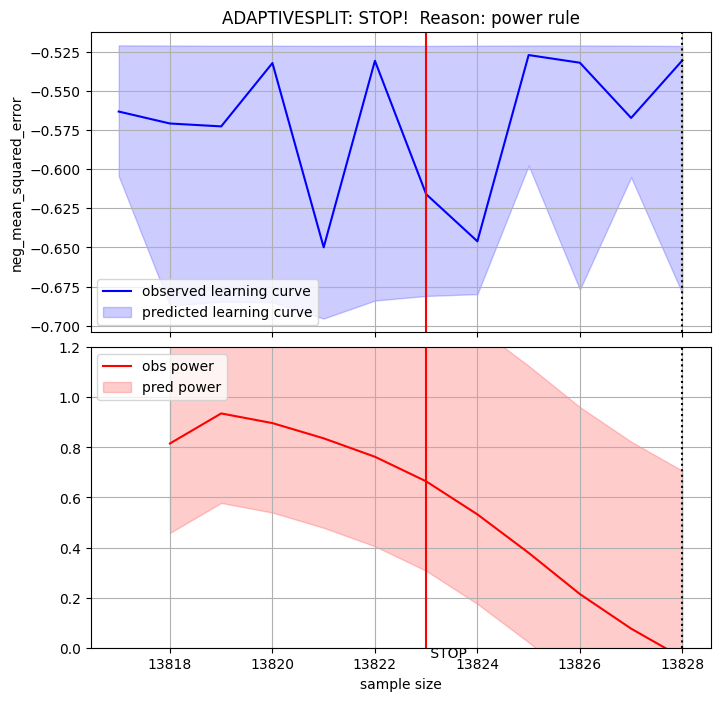

In [3]:
##
# Use Ridge regression;
##

from sklearn.linear_model import RidgeCV

model = RidgeCV(scoring='neg_mean_absolute_error',
                alphas=(0.1, 1, 10))  # default alpha values;

from adaptivesplit.sklearn_interface.split import AdaptiveSplit


adsplit = AdaptiveSplit(total_sample_size=len(y_train), plotting=True)
with np.errstate(divide='ignore'): #ignore pygam's zero division warnings;
    res, fig = adsplit(X_train, y_train, model, fast_mode=True, predict=False, random_state=42)
stop = res.estimated_stop
print(res)